In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [2]:
# Upload the dataset from your local machine
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [3]:
# Assuming the file name is 'your_dataset.csv'
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

In [4]:
# Display the first few rows of the dataset
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# Check the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [8]:
# Handling missing values (if any)
# Example: data.fillna(method='ffill', inplace=True)

# Check for duplicates
print("Duplicate records:", data.duplicated().sum())


Duplicate records: 17


In [9]:
# Remove duplicates (if any)
data = data.drop_duplicates()

In [10]:
# Descriptive statistics
print("Descriptive statistics:\n", data.describe())

Descriptive statistics:
         Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


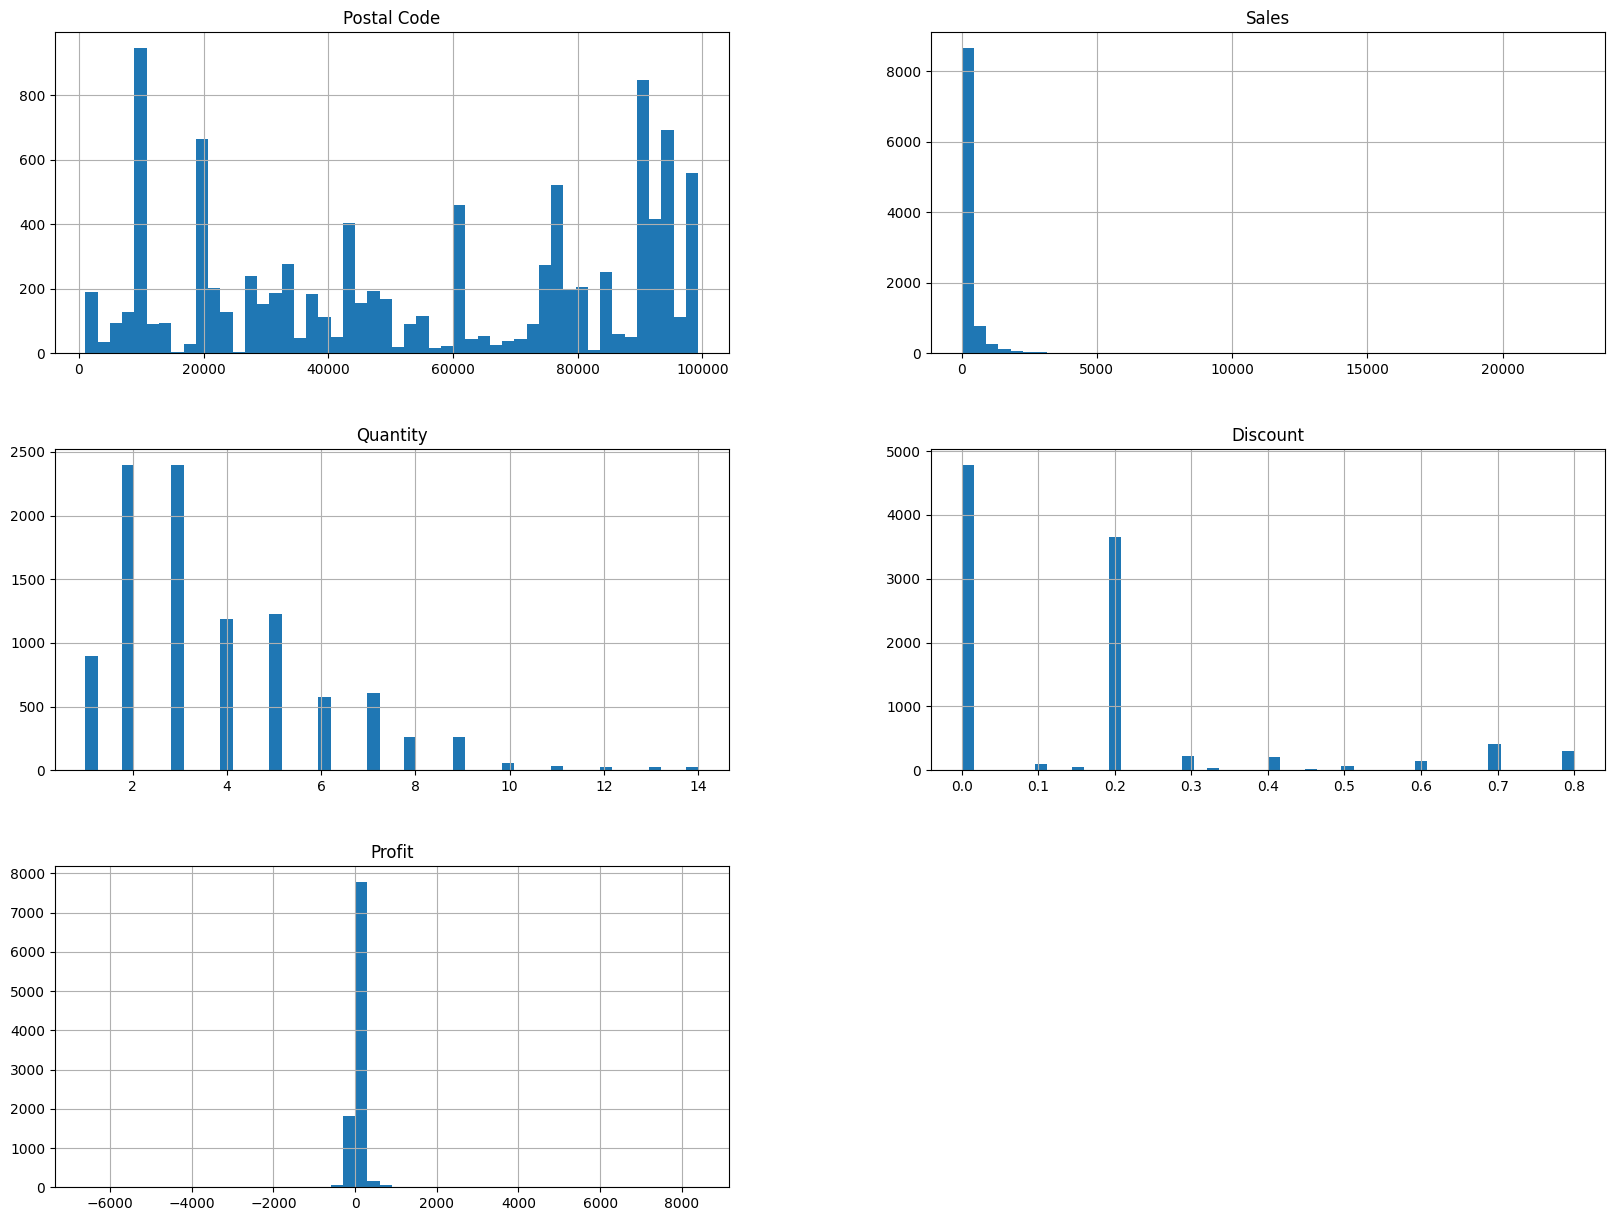

In [11]:

# Univariate Analysis
# Distribution of numerical features
data.hist(bins=50, figsize=(20,15))
plt.show()

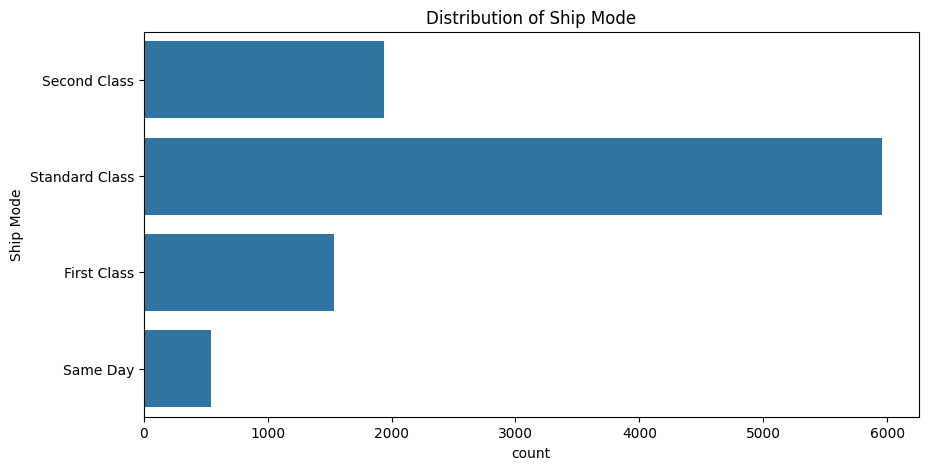

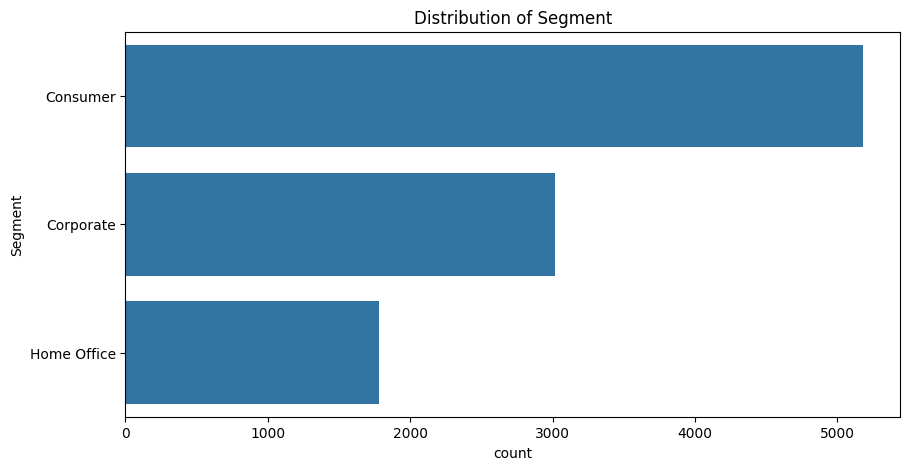

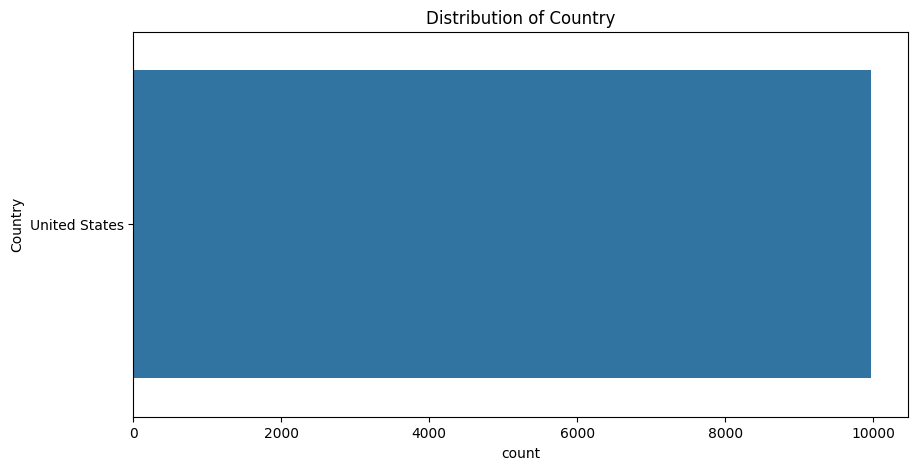

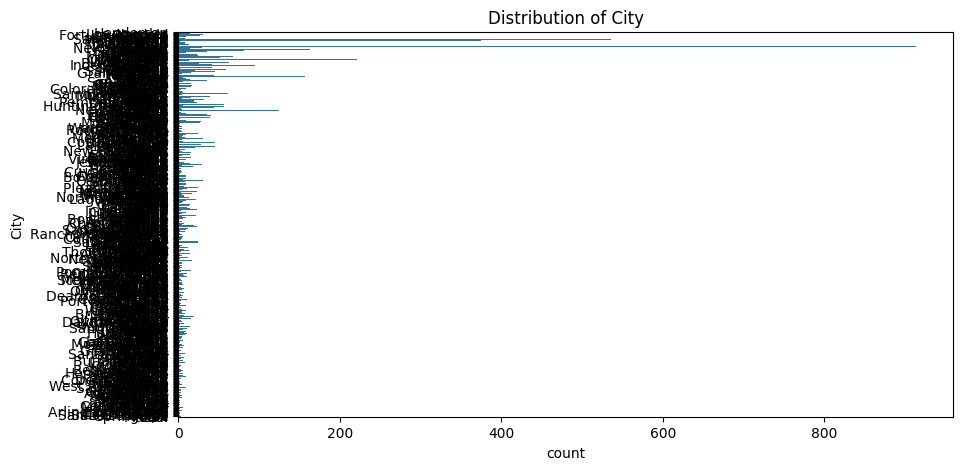

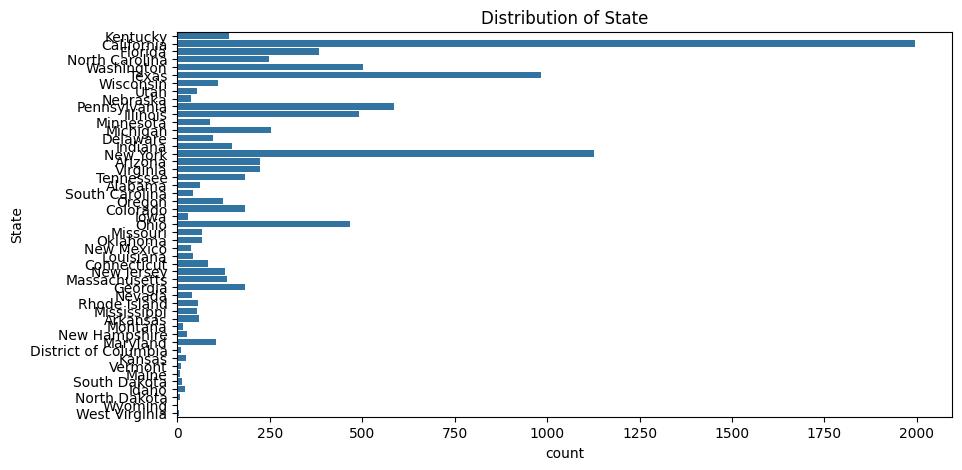

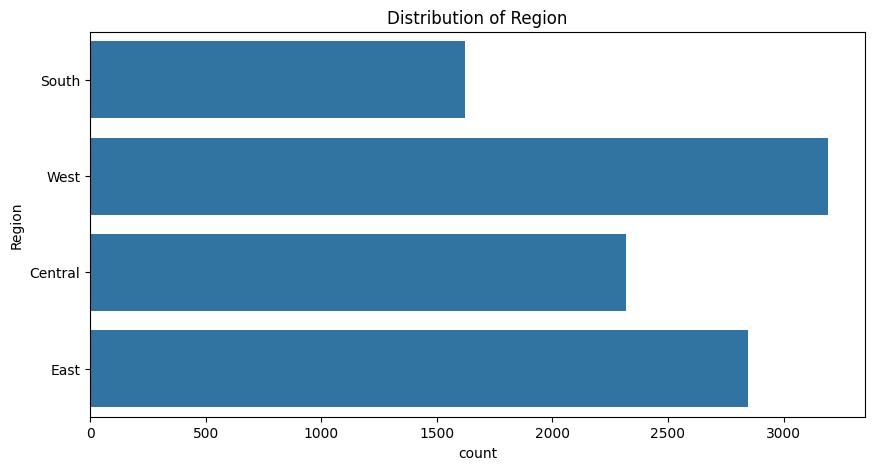

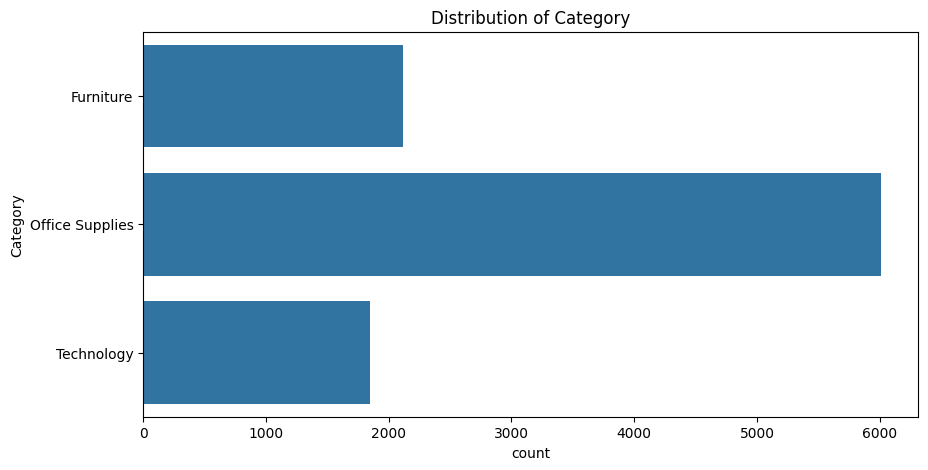

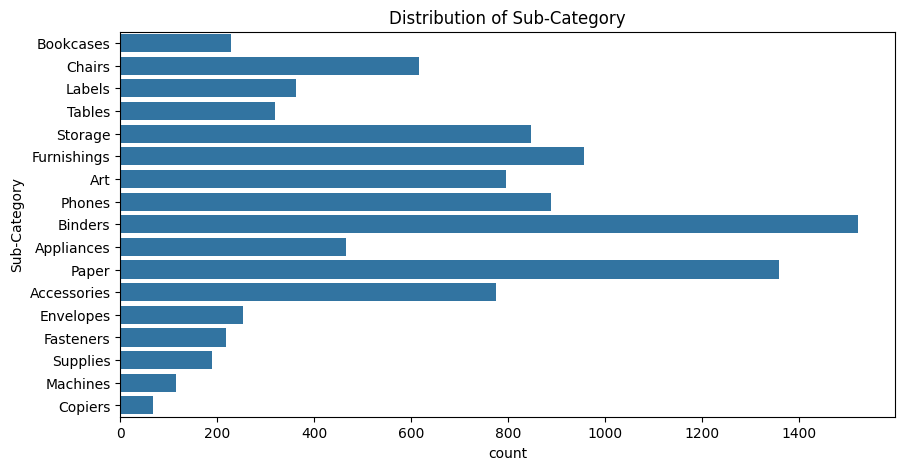

In [12]:
# Distribution of categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.show()


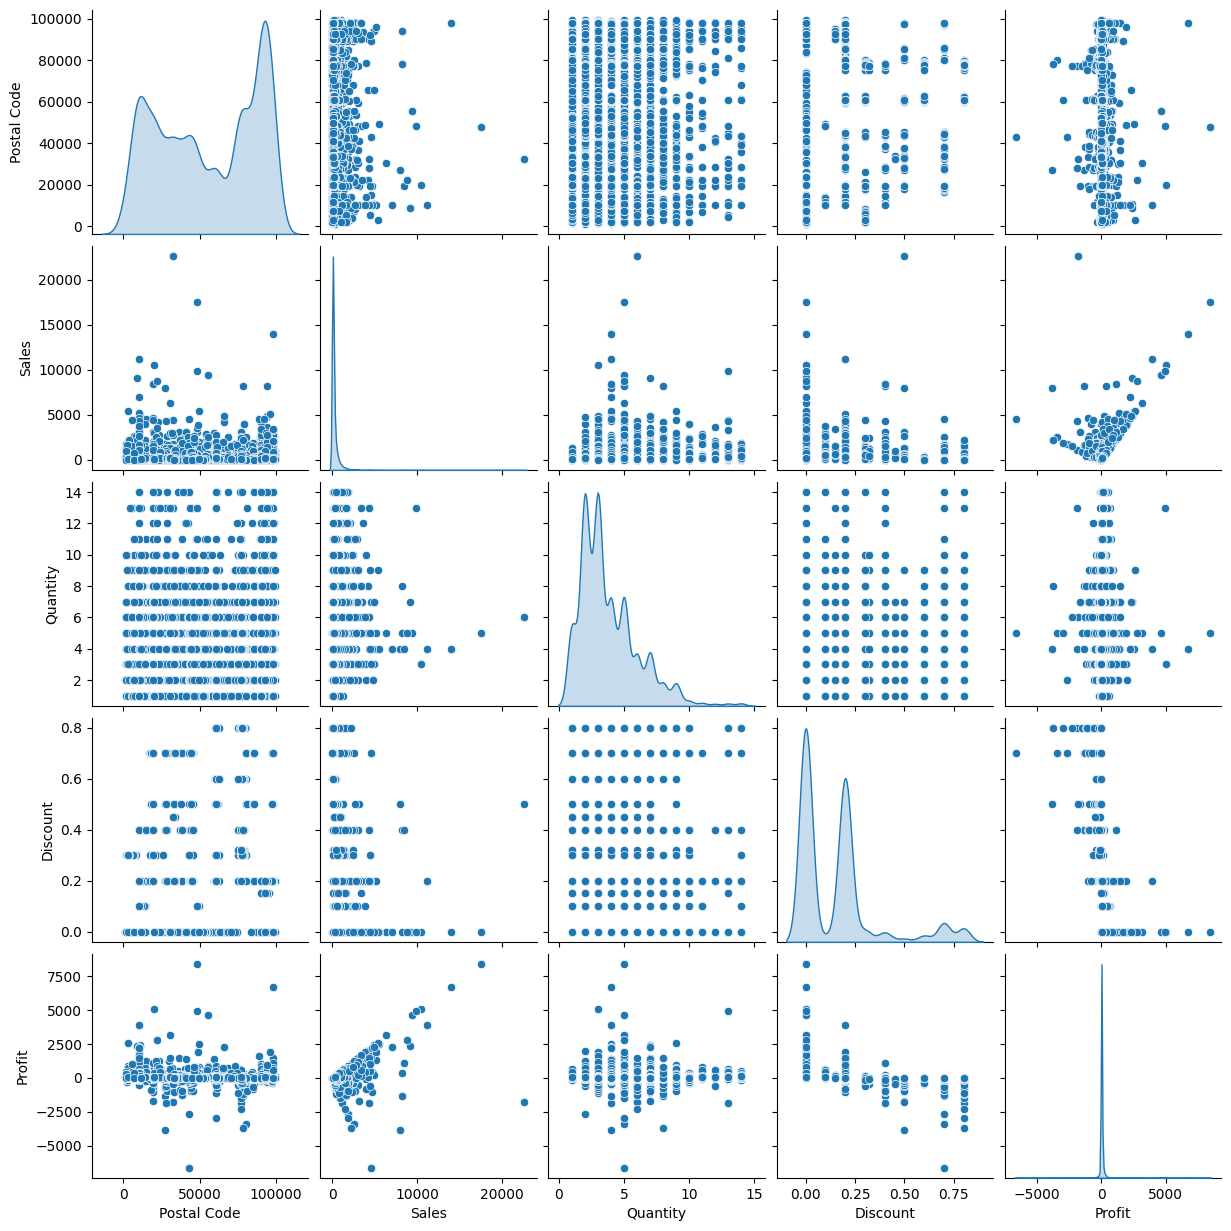

In [13]:
# Bivariate Analysis
# Relationship between sales and other numerical features
sns.pairplot(data, diag_kind="kde")
plt.show()

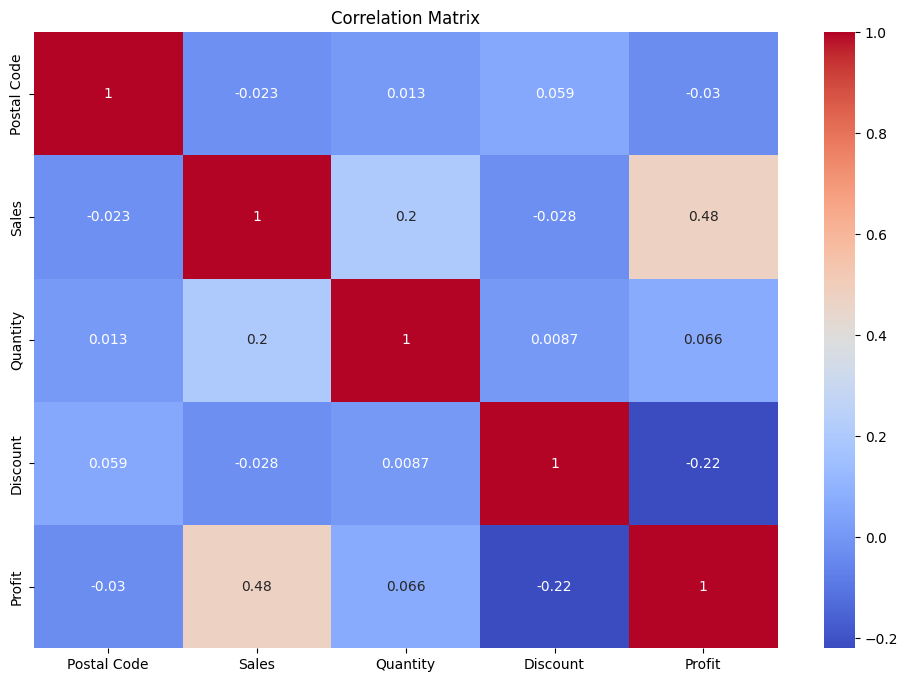

In [19]:
# Filter out only the numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=[np.number])

# Check if there are any numerical columns in the filtered data
if numerical_data.shape[1] > 0:
    # Perform Correlation Analysis
    corr = numerical_data.corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("No numerical data available for correlation analysis.")


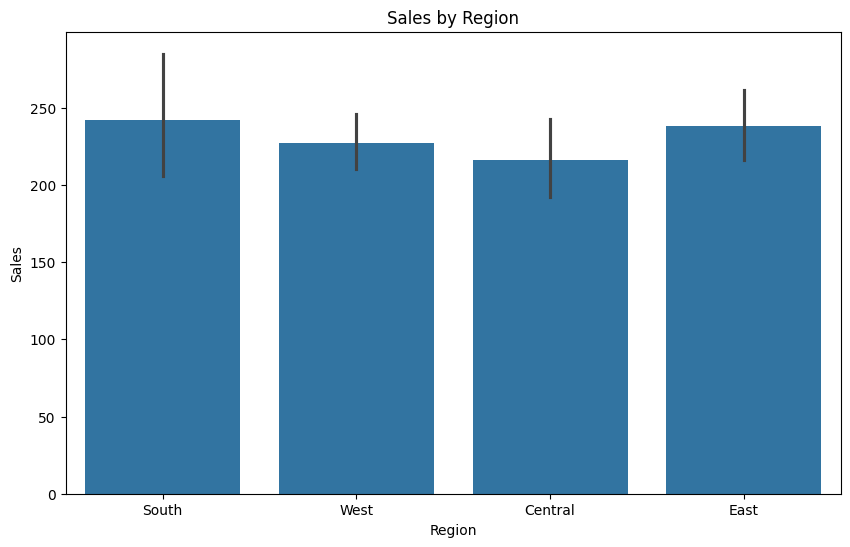

In [15]:
# Identify Potential Business Problems
# Example: Low sales in specific regions or product categories

# Analyzing sales by region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', data=data)
plt.title('Sales by Region')
plt.show()


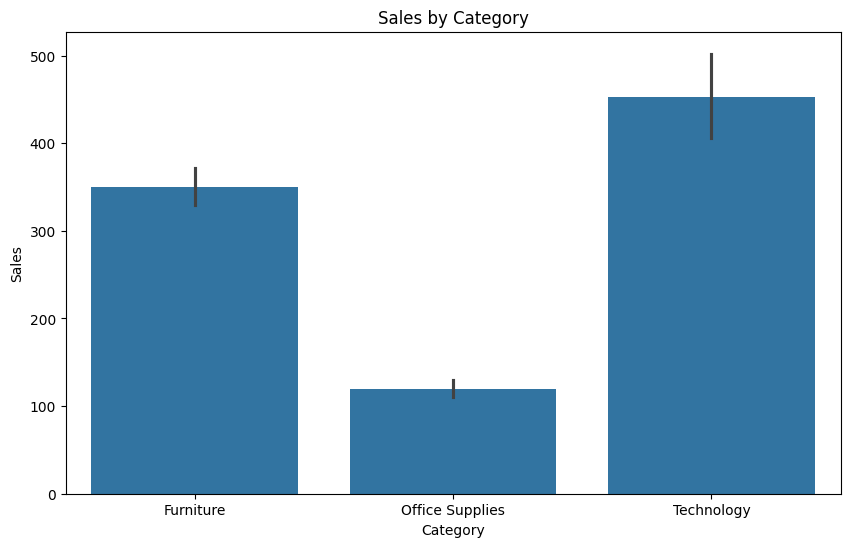

In [16]:
# Analyzing sales by product category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=data)
plt.title('Sales by Category')
plt.show()

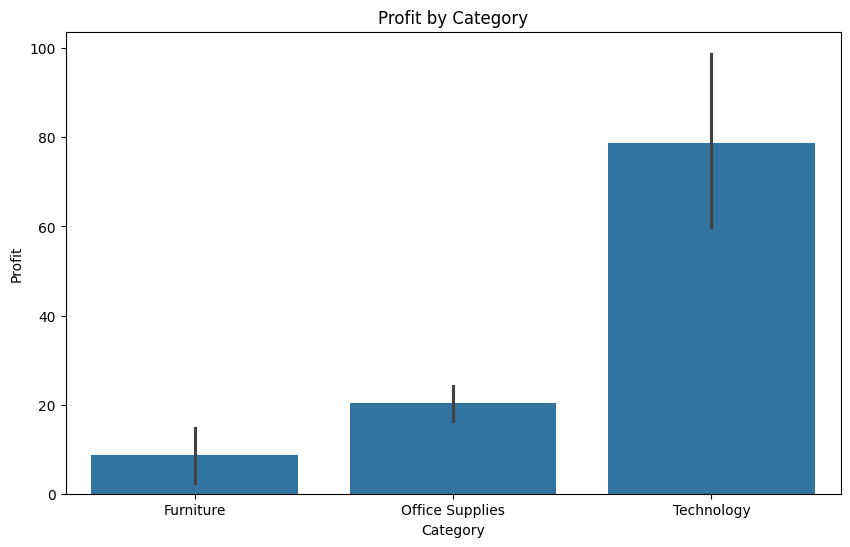

In [17]:
# Analyzing profit by product category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Profit', data=data)
plt.title('Profit by Category')
plt.show()
